In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

eda_class = pd.read_csv('eda_classification.csv')
eda_class

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,-17.933519,Jun,6.559220,-14.452810,-4.732855,0.381673,2.563194,"($1,306.52)",-89.394348,-28.454044,-16.201298,-0.01%,0.217010,tesla,thurday,9.729891,-0.786431,small,1
1,-37.214754,July,10.774930,-15.384004,-0.077339,10.983774,-15.210206,($24.86),153.032652,-32.557736,69.675903,0.00%,-3.584908,Toyota,thur,35.727926,-0.985552,small,0
2,0.330441,Aug,-19.609972,-9.167911,2.064124,12.071688,12.506141,($110.85),-141.437276,-20.794952,55.042604,0.00%,-3.991366,bmw,wednesday,-9.283523,-3.394718,small,1
3,-13.709765,Aug,-8.011390,6.759264,1.727615,-1.768382,24.039733,($324.43),51.039653,-7.046908,-31.424419,0.01%,7.908897,Toyota,wed,-2.891882,-2.690222,small,0
4,-4.202598,May,7.076210,-26.004919,-4.269696,-3.414224,2.115989,"$1,213.37",-31.046700,19.061182,-31.525515,-0.01%,0.846719,Honda,wednesday,25.497480,3.516801,small,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.967405,Apr,-25.561679,28.188776,1.150223,-1.887983,-10.482834,"($1,481.74)",203.758763,28.032961,-13.506947,0.00%,2.840758,volkswagon,thurday,-30.167906,0.979618,small,1
9995,41.257961,May,-0.264639,11.293025,-5.768300,4.088754,0.300116,$417.34,81.247235,32.269791,20.841980,0.00%,-2.268718,bmw,wed,-7.595250,0.269051,small,1
9996,11.431402,May,-28.363664,-35.619430,10.238941,6.494562,-0.407489,"($1,937.19)",68.974245,-12.463081,3.114821,-0.02%,-5.195810,Honda,wednesday,9.583622,1.684282,small,1
9997,-19.039869,Aug,-20.251227,-3.002298,-1.039843,10.741492,-26.970477,"($1,472.62)",82.525340,18.593754,-67.440846,-0.01%,6.179807,bmw,friday,3.873697,-0.525457,small,0


Some initial thoughts pertaining to this dataset, I can see that there is a column that appears to be for month values, so I will explore that to ensure everything is consistent in spelling and the way they are formatted. I can also see that there are some inconsistencies in what looks like the make of a vehicle. I can also see that there appears to be a column for days of the week and I can see there are some mis-spellings and inconsistent values that will need to be explored and corrected. Lastly, there is a category for measured values of some kind (small and medium are what I can see), so that will need to be explored and cleaned if necessary.

Regarding the numerical columns, there are parenthesis, dollar signs and percentages that may need to be removed in order to perform descriptive statistics on those columns and to be able to use them later on as potential features in the model that is chosen. I will also be checking for missing values and outliers in the data.

### Cleaning column with monthly values

In [28]:
eda_class['x1'].value_counts()

x1
July       2709
Jun        2357
Aug        2059
May        1144
sept.       912
Apr         413
Oct         246
Mar         116
Nov          27
Feb          10
Dev           5
January       1
Name: count, dtype: int64

In [29]:
# Correcting the values in the column for months to abbreviate each value to the first 3 letters of the month to make them
# Consistent with each other

month_values = {"Dev": "Dec",
                "sept.": "Sept",
                "January": "Jan",
                "July": "Jul"}

eda_class['x1'] = eda_class['x1'].replace(month_values)

In [30]:
# Verifying changes have been made correctly

eda_class['x1'].value_counts()

x1
Jul     2709
Jun     2357
Aug     2059
May     1144
Sept     912
Apr      413
Oct      246
Mar      116
Nov       27
Feb       10
Dec        5
Jan        1
Name: count, dtype: int64

### Cleaning the values in the vehicle make column

In [31]:
eda_class['x13'].value_counts()

x13
volkswagon    3132
Toyota        2773
bmw           1837
Honda         1277
tesla          545
chrystler      291
nissan          90
ford            39
mercades        11
chevrolet        3
Name: count, dtype: int64

In [32]:
# This is capitlizating all of the vehicle makes, capitalizing each letter in BMW, and correcting the spelling in Mercedes
# and Chrysler to clean this column of data

eda_class['x13'] = eda_class['x13'].str.capitalize()
eda_class['x13'] = eda_class['x13'].replace('Bmw', "BMW")
eda_class['x13'] = eda_class['x13'].replace("Mercades", "Mercedes")
eda_class['x13'] = eda_class['x13'].replace("Chrystler", "Chrysler")

In [33]:
eda_class['x13'].value_counts()

x13
Volkswagon    3132
Toyota        2773
BMW           1837
Honda         1277
Tesla          545
Chrysler       291
Nissan          90
Ford            39
Mercedes        11
Chevrolet        3
Name: count, dtype: int64

### Cleaning the column with the days of the week values

In [34]:
eda_class['x14'].value_counts()

x14
wed          3709
thurday      3336
wednesday    1489
thur         1097
tuesday       214
friday        130
monday         15
fri             7
Name: count, dtype: int64

In [35]:
# This is cleaning the days of the week by capitalizing the first letter in each value and abreviating each month value
# To maintain consistency.

day_values = {"wed": "Wed",
              "thurday": "Thur",
              "thur": "Thur",
              "wednesday": "Wed",
              "monday": "Mon",
              "fri": "Fri",
              "friday": "Fri",
              "tuesday": "Tue"}

eda_class['x14'] = eda_class['x14'].replace(day_values)

In [36]:
eda_class['x14'].value_counts()

x14
Wed     5198
Thur    4433
Tue      214
Fri      137
Mon       15
Name: count, dtype: int64

### Checking column values that are related to size

In [37]:
eda_class['x17'].value_counts()

x17
small     8849
medium     783
large      367
Name: count, dtype: int64

### Cleaning numerical columns
##### - Replacing parenthesis with a negative sign
##### - Removing dollar signs, percentages and commas

In [38]:
eda_class.replace({"\(": "-", "\)": "", "\$":"", "%":"", ",":""}, regex=True, inplace=True)

In [39]:
eda_class.head(15)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,-17.933519,Jun,6.559220,-14.452810,-4.732855,0.381673,2.563194,-1306.52,-89.394348,-28.454044,-16.201298,-0.01,0.217010,Tesla,Thur,9.729891,-0.786431,small,1
1,-37.214754,Jul,10.774930,-15.384004,-0.077339,10.983774,-15.210206,-24.86,153.032652,-32.557736,69.675903,0.00,-3.584908,Toyota,Thur,35.727926,-0.985552,small,0
2,0.330441,Aug,-19.609972,-9.167911,2.064124,12.071688,12.506141,-110.85,-141.437276,-20.794952,55.042604,0.00,-3.991366,BMW,Wed,-9.283523,-3.394718,small,1
3,-13.709765,Aug,-8.011390,6.759264,1.727615,-1.768382,24.039733,-324.43,51.039653,-7.046908,-31.424419,0.01,7.908897,Toyota,Wed,-2.891882,-2.690222,small,0
4,-4.202598,May,7.076210,-26.004919,-4.269696,-3.414224,2.115989,1213.37,-31.046700,19.061182,-31.525515,-0.01,0.846719,Honda,Wed,25.497480,3.516801,small,1
5,12.570277,Jul,2.543883,25.673620,-0.842858,3.400531,37.176963,-1508.42,-98.956484,11.734073,100.654890,0.00,15.359466,Toyota,Thur,9.000782,1.929145,small,1
6,17.949374,Jun,-35.406853,-25.164967,0.587439,-13.782894,-5.204895,-1431.44,-205.638274,16.399039,116.749751,0.01,5.964466,BMW,Thur,15.851576,-0.819405,small,0
7,38.645268,Jun,-21.871066,-74.405515,-9.707926,6.114417,-17.883435,1613.55,-239.151432,28.570116,-333.261028,0.01,5.556269,Ford,Wed,-15.112181,2.480845,small,0
8,35.279887,Jun,-2.004483,-12.071977,-1.020028,3.250741,-19.377852,1178.11,-108.229348,-29.886388,-126.434298,0.00,4.085897,Volkswagon,Thur,-10.558902,1.700618,medium,1
9,-31.756646,Jul,-5.499585,6.198889,-4.569550,13.902393,1.031500,-312.04,299.025699,24.338666,-25.001839,0.00,4.204932,Honda,Thur,-5.320926,4.405564,small,0


### Converting numerical columns to float

In [40]:
eda_class['x7'] = eda_class['x7'].astype(float)
eda_class['x11'] = eda_class['x11'].astype(float)

In [41]:
eda_class.dtypes

x0     float64
x1      object
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13     object
x14     object
x15    float64
x16    float64
x17     object
y        int64
dtype: object

In [42]:
numerical_features = ['x0', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x15', 'x16']
categorical_features = ['x1', 'x13', 'x14', 'x17'] 

### Checking for missing values

In [43]:
print(eda_class[numerical_features].isnull().sum())
print()
print(eda_class[categorical_features].isnull().sum())

x0     3
x2     4
x3     3
x4     2
x5     2
x6     0
x7     3
x8     1
x9     0
x10    3
x11    2
x12    4
x15    0
x16    1
dtype: int64

x1     0
x13    1
x14    2
x17    0
dtype: int64


In [44]:
# Replacing all missing numerical features with the mean of that column, and replacing all missing values in categorical
# columns with the mode of that column

eda_class[numerical_features] = eda_class[numerical_features].transform(lambda x: x.fillna(x.mean()))
eda_class[categorical_features] = eda_class[categorical_features].fillna(eda_class[categorical_features].mode().iloc[0])

In [45]:
# Rechecking the missing values to ensure they are no longer present:

print(eda_class[numerical_features].isnull().sum())
print()
print(eda_class[categorical_features].isnull().sum())

x0     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x15    0
x16    0
dtype: int64

x1     0
x13    0
x14    0
x17    0
dtype: int64


### Checking for outliers in the numerical columns

C:\Users\meierd\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\meierd\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\meierd\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\meierd\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

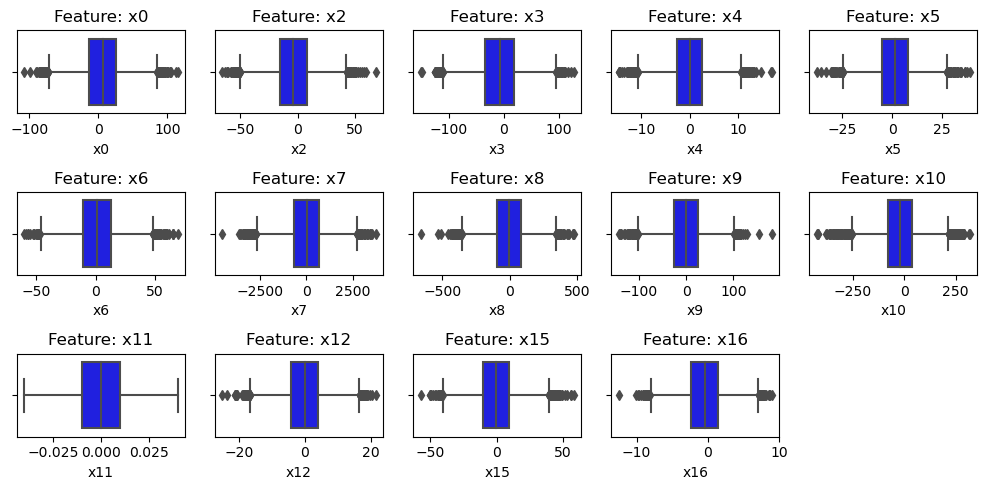

In [46]:
# This is putting all numerical features together and all categorical features together.

fig, axs = plt.subplots(3, 5, figsize=(10, 5))

axs = axs.flatten()

for i, num_feature in enumerate(numerical_features):
    sns.boxplot(x=eda_class[num_feature], color='blue', ax=axs[i])
    axs[i].set_title(f'Feature: {num_feature}')
    axs[i].set_xlabel(num_feature)

for j in range(len(numerical_features), 15):
    fig.delaxes(axs[j])
    # Adjusting layout to prevent overlapping
plt.tight_layout()

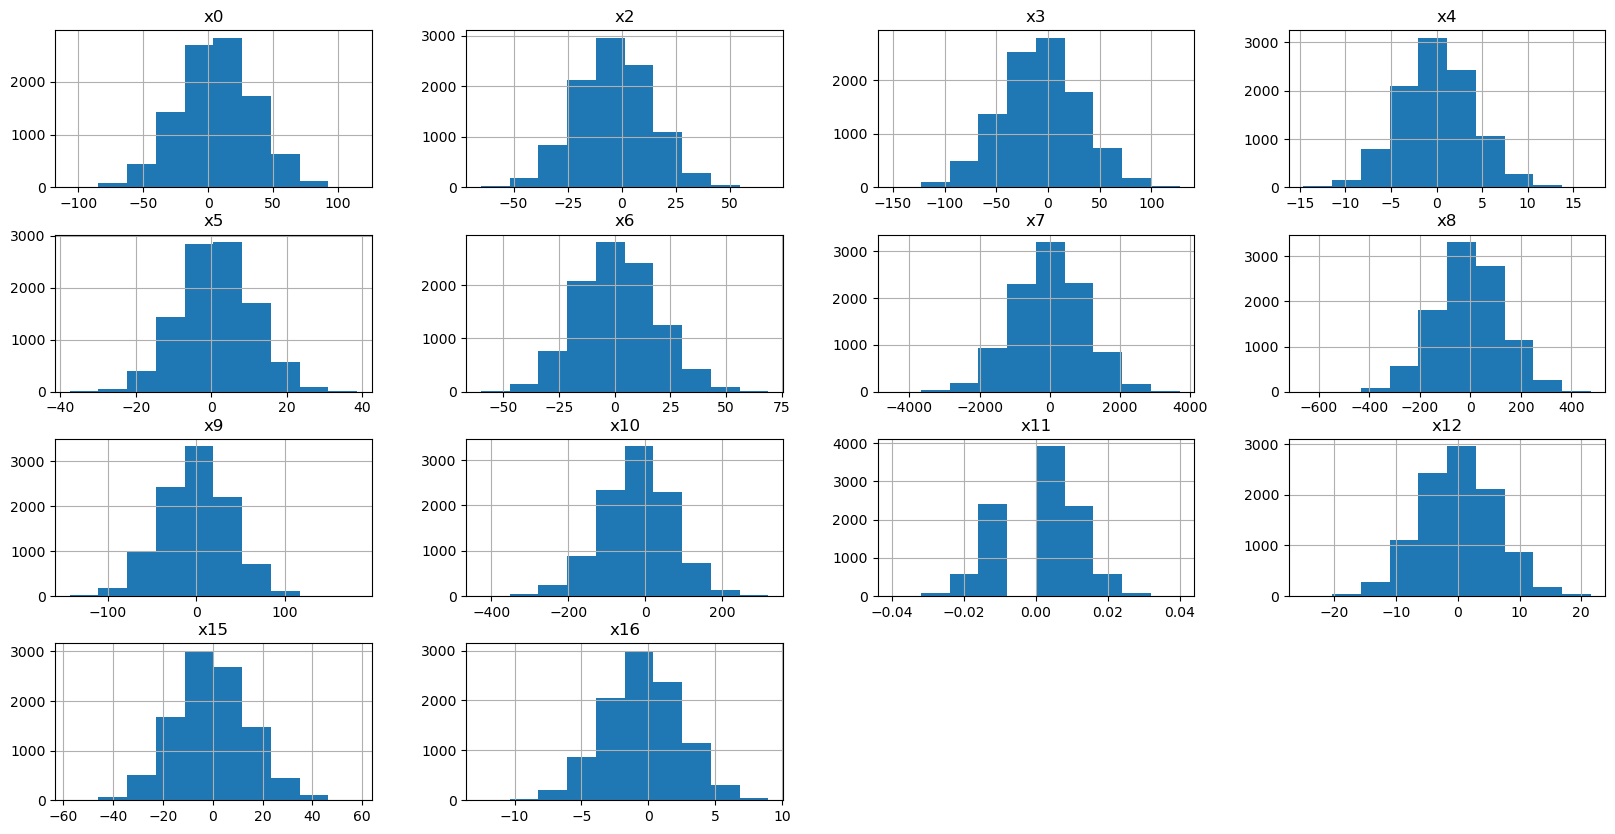

In [47]:
eda_class[numerical_features].hist(bins=10, figsize=(20, 10));

In [48]:
# It would appear that the numerical features in the dataset are normally distributed. This is a function that will
# calculate the outliers in each column of a dataframe that is provided to the function

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [55]:
#This is using a for loop to go through each column that is in numerical features and removing the outliers by applying the
# remove_outlier function

for column in eda_class[numerical_features]:
    new_df = remove_outlier(eda_class[numerical_features], column)

In [56]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9941 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      9941 non-null   float64
 1   x2      9941 non-null   float64
 2   x3      9941 non-null   float64
 3   x4      9941 non-null   float64
 4   x5      9941 non-null   float64
 5   x6      9941 non-null   float64
 6   x7      9941 non-null   float64
 7   x8      9941 non-null   float64
 8   x9      9941 non-null   float64
 9   x10     9941 non-null   float64
 10  x11     9941 non-null   float64
 11  x12     9941 non-null   float64
 12  x15     9941 non-null   float64
 13  x16     9941 non-null   float64
dtypes: float64(14)
memory usage: 1.1 MB


This looks like we removed 999 values from the dataset after all outliers were removed.

In [51]:
eda_class_corr = new_df[numerical_features].corrwith(new_df["y"])
print(f"How numerical features correlate with target: \n\n{eda_class_corr}")

TypeError: list indices must be integers or slices, not list

## Encoding non ordinal features

In [ ]:
# Using One-Hot Encoding for the column with makes of vehicles, months of year and days of the week. The reason 
# for this is because there is no order o the vehicles and it is not a binary feature, so One-Hot Encoding makes the most 
# sense. With regards to the columns with month and day values, there is no date associated with these, so there is no
# inherent order with regards to these features.

new_df = pd.get_dummies(new_df, columns=['x1', 'x13', 'x14'], dtype=int)

In [ ]:
new_df.head(15)

## Encoding ordinal features

In [ ]:
import category_encoders
from category_encoders import OrdinalEncoder

# Values like small, medium, large and days of the week and months of the year have a particular order/ranking to them, which 
# is why these would be considered ordinal features.

ordinal_mapping_size = [{'col': 'x17', "mapping":{"small":1, "medium":2, "large":3}}]

ord_enc = OrdinalEncoder(mapping=ordinal_mapping_size)
new_df[['x17']] = ord_enc.fit_transform(new_df['x17'])

In [ ]:
print(new_df['x17'].value_counts())

In [ ]:
# This is getting the percentage that each class makes up for the target variable

new_df.y.value_counts()/len(new_df.y)

This demonstrates that our dataset is balanced as both classes in the target variable are relatively close to each other, with the 0 class making up roughly 51% of the target and 1 class making up 49% of the target.

## Setting up the Model

In [ ]:
# I am using Logistic Regression as the model as it can predict a binary categorical target variable, which we are trying
# to predict 0 and 1 values

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
# Setting up the model to use all of the features as input for the model.

X = new_df.drop(['y'], axis = 1)
y = new_df.y

# Establishing the training and testing set of the data, along with setting the training/test ratio to 80/20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Setting up an instance of the Logistic Regression model, fitting it with the training data, and then making predictions
# with the trained model

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

## Calculating metrics of the model's performance

### Confusion Matrix

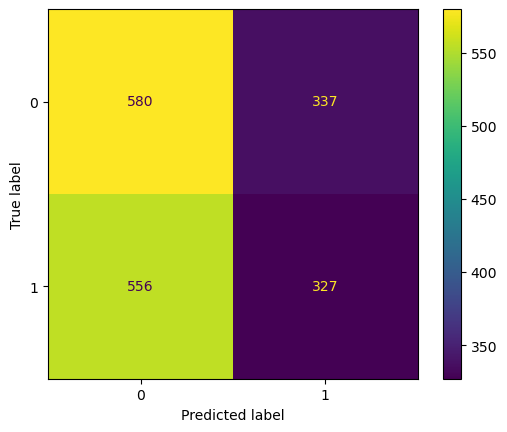

In [274]:
# Creating a confusion matrix off of the test data and the predicted data and plotting the results

cnf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cnf_matrix, display_labels=logreg.classes_).plot();

This set of numbers tell us how the model performed predicting 1s and 0s based on how the predicted values compared to the test values. It shows us how many times the model correctly predicted a 1 value, or true positives (353), 1 predictions that were actually 0s, or false positives (377), 0 predictions that were actually 0, or true negatives (620), and 0 predictions that were actually 1s, or false negatives (650).

### Classification Report

In [275]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.63      0.57       917
           1       0.49      0.37      0.42       883

    accuracy                           0.50      1800
   macro avg       0.50      0.50      0.49      1800
weighted avg       0.50      0.50      0.50      1800



The classification report gives us metrics surrounding the precision, recall, f1 score, accuracy, macro average and weighted average.

The precision of the model tells us the percentage of positive predictions that the model made out of all actual positive predictions. Out of all of the 1s that the model predicted would be 1s, only 49% were actually 1s.

For recall, this measurement tells us the total positive predictions relative to the total actual positives, which this model did 37% of the time.

For the F1 score, this is a weighted harmonic mean of both precision and recall. The closer to 1 this measurement is, the better the model is performing. This was at 42%, so our model is not performing very well.

The accuracy of our model simply shows how many correct predictions the made overall, which was 50%, so the model is getting predictions right basically half of the time.

The support shows us the count of how many pieces of data belonged to the 0s class (917) and the 1s class (883) in the test dataset.

The macro average shows the result when all classes equally contribute to the final averaged metric. The weighted average is where each class's contribution to the metric is weighted by its size. Considering the size of each class is nearly the same, these measurements will look relatively identical to each other.